#Data Exploration

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot

### Loading Data
Looking at shape and size of train and test sets, column names, etc.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# samplesubmission = pd.read_csv("/content/drive/MyDrive/summer/ix '23/project/SampleSubmission.csv")
train = pd.read_csv("/content/drive/MyDrive/summer/ix '23/project/Train.csv")
test = pd.read_csv("/content/drive/MyDrive/summer/ix '23/project/Test.csv")
descriptions = pd.read_csv("/content/drive/MyDrive/summer/ix '23/project/VariableDefinitions.csv")

In [4]:
descriptions

,Column Name,Definition
0,id,Unique identifier for each tourist
1,country,The country a tourist coming from.
2,age_group,The age group of a tourist.
3,travel_with,The relation of people a tourist travel with t...
4,total_female,Total number of females
5,total_male,Total number of males
6,purpose,The purpose of visiting Tanzania
7,main_activity,The main activity of tourism in Tanzania
8,infor_source,The source of information about tourism in Tan...
9,tour_arrangment,The arrangment of visiting Tanzania


In [5]:
print("Training set shape: ", train.shape)
train.head()

Training set shape:  (18506, 21)


,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
0,tour_id1hffseyw,ITALY,45-64,With Children,0.0,2.0,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
1,tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
2,tour_id62vz7e71,UNITED STATES OF AMERICA,65+,With Spouse,1.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,No,6,6,Yes,Higher Cost
3,tour_idrc76tzix,RWANDA,25-44,With Spouse and Children,3.0,1.0,Leisure and Holidays,Beach Tourism,"Radio, TV, Web",Independent,...,No,No,No,No,No,No,3,0,No,Lower Cost
4,tour_idn723m0n9,UNITED STATES OF AMERICA,45-64,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,Yes,Yes,7,0,Yes,Higher Cost


In [6]:
print("Test set shape: ", test.shape)
test.head()

Test set shape:  (6169, 20)


,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz
0,tour_idynufedne,KOREA,25-44,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,Others,Independent,No,No,No,No,No,No,No,7,4,Yes
1,tour_id9r3y5moe,UNITED KINGDOM,45-64,With Children,1.0,1.0,Leisure and Holidays,Conference Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,7,0,Yes
2,tour_idf6itml6g,ITALY,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Beach Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,No,Yes,No,No,No,0,6,Yes
3,tour_id99u4znru,KENYA,25-44,Alone,0.0,1.0,Other,Beach Tourism,"Radio, TV, Web",Independent,No,No,No,No,No,No,No,3,4,No
4,tour_idj4i9urbx,ZAMBIA,25-44,Alone,0.0,1.0,Business,Widlife Tourism,"Radio, TV, Web",Independent,No,No,No,No,No,No,No,6,0,No


So we have 18506 examples in our training set, and 6169 samples in our test set.

Column that we are training for is called cost_category. Column names look okay.

-> Might want to replace cost_category values (string) with integers (0-5) to make later ML implementation easier. Also so that we can sort by cost as currently Normal is last aplhabetically so makes visualisation somewhat more difficult.

-> Might want to split training set into a dev set that we iteratively test our model on as well? So we can reserve test set for benchmarking since there's no ability to verify accuracy without uploading onto site (as far as I'm aware).



In [7]:
train.dtypes

Tour_ID                   object
country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement          object
package_transport_int     object
package_accomodation      object
package_food              object
package_transport_tz      object
package_sightseeing       object
package_guided_tour       object
package_insurance         object
night_mainland             int64
night_zanzibar             int64
first_trip_tz             object
cost_category             object
dtype: object

### Data Visualisation
Looking at frequency distributions for categorical variables, missing values, extreme values

In [8]:
#Training Set
for column in train:
    print("---------",column.upper(),"---------")
    print(train[column].value_counts(normalize=True))

--------- TOUR_ID ---------
tour_id1hffseyw    0.000054
tour_idmewz05ax    0.000054
tour_id1r5sg681    0.000054
tour_idadk8knjo    0.000054
tour_id8lpsjwla    0.000054
                     ...   
tour_idep32dx46    0.000054
tour_id12ljaxb9    0.000054
tour_idg067w7pf    0.000054
tour_id6qog16mi    0.000054
tour_idceoq9por    0.000054
Name: Tour_ID, Length: 18506, dtype: float64
--------- COUNTRY ---------
UNITED STATES OF AMERICA    0.153788
UNITED KINGDOM              0.114557
ITALY                       0.087809
FRANCE                      0.057495
GERMANY                     0.052361
                              ...   
ERITREA                     0.000054
NIGER                       0.000054
ESTONIA                     0.000054
CAPE VERDE                  0.000054
JORDAN                      0.000054
Name: country, Length: 131, dtype: float64
--------- AGE_GROUP ---------
25-44    0.488868
45-64    0.305198
18-24    0.120069
65+      0.079272
<18      0.006592
Name: age_group, dtyp

In [9]:
#Test Set
for column in test:
    print("---------",column.upper(),"---------")
    print(train[column].value_counts(normalize=True))

--------- TOUR_ID ---------
tour_id1hffseyw    0.000054
tour_idmewz05ax    0.000054
tour_id1r5sg681    0.000054
tour_idadk8knjo    0.000054
tour_id8lpsjwla    0.000054
                     ...   
tour_idep32dx46    0.000054
tour_id12ljaxb9    0.000054
tour_idg067w7pf    0.000054
tour_id6qog16mi    0.000054
tour_idceoq9por    0.000054
Name: Tour_ID, Length: 18506, dtype: float64
--------- COUNTRY ---------
UNITED STATES OF AMERICA    0.153788
UNITED KINGDOM              0.114557
ITALY                       0.087809
FRANCE                      0.057495
GERMANY                     0.052361
                              ...   
ERITREA                     0.000054
NIGER                       0.000054
ESTONIA                     0.000054
CAPE VERDE                  0.000054
JORDAN                      0.000054
Name: country, Length: 131, dtype: float64
--------- AGE_GROUP ---------
25-44    0.488868
45-64    0.305198
18-24    0.120069
65+      0.079272
<18      0.006592
Name: age_group, dtyp

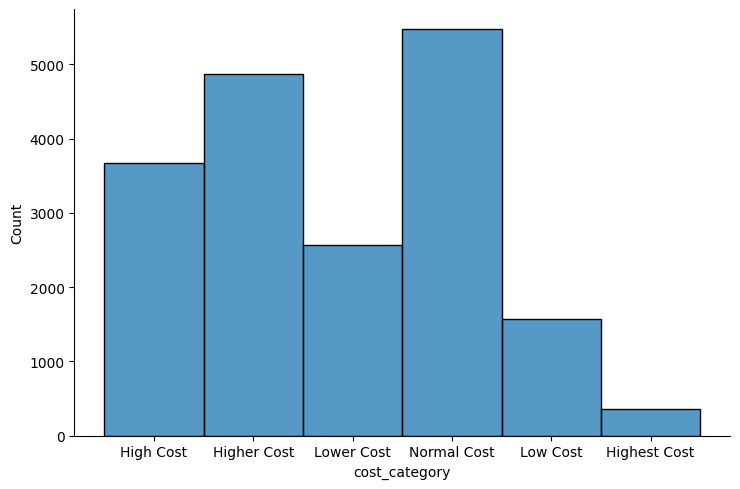

In [10]:
#Frequency distribution for cost types
sns.displot(
    train['cost_category'],
    aspect=1.5
)

Good news - train and test set distributions are ostensibly the same! So it stands to reason that if we do well on the training set, the transition to the test set should be pretty smooth too.

-> Most of the people fall into the normal cost/higher cost category, so might be worth focusing our efforts on making sure that predictions for those groups are best, at least to start with.

In [11]:
#Find missing data
print("Training set missing: ")
print(train.isna().sum()/train.shape[0])
print("----------------------")
print("Test set missing: ")
print(test.isna().sum()/train.shape[0])

Training set missing: 
Tour_ID                  0.000000
country                  0.000000
age_group                0.000000
travel_with              0.058089
total_female             0.000108
total_male               0.000324
purpose                  0.000000
main_activity            0.000000
info_source              0.000000
tour_arrangement         0.000000
package_transport_int    0.000000
package_accomodation     0.000000
package_food             0.000000
package_transport_tz     0.000000
package_sightseeing      0.000000
package_guided_tour      0.000000
package_insurance        0.000000
night_mainland           0.000000
night_zanzibar           0.000000
first_trip_tz            0.000000
cost_category            0.000000
dtype: float64
----------------------
Test set missing: 
Tour_ID                  0.000000
country                  0.000000
age_group                0.000000
travel_with              0.019507
total_female             0.000108
total_male               0.000054
pu

Missing data mostly comes from travel_with, total_male, and total_female. But definitely not a significant amount - maybe just a handful fo entries in each one. Will not affect performance too much, but we may still want to look into it.

### Relationships
Seeing correlates may help inform development of ML model, so a pair plot might help. NB: This only helps visualize relationships between floating point variables i.e. will not help with categorical variables.

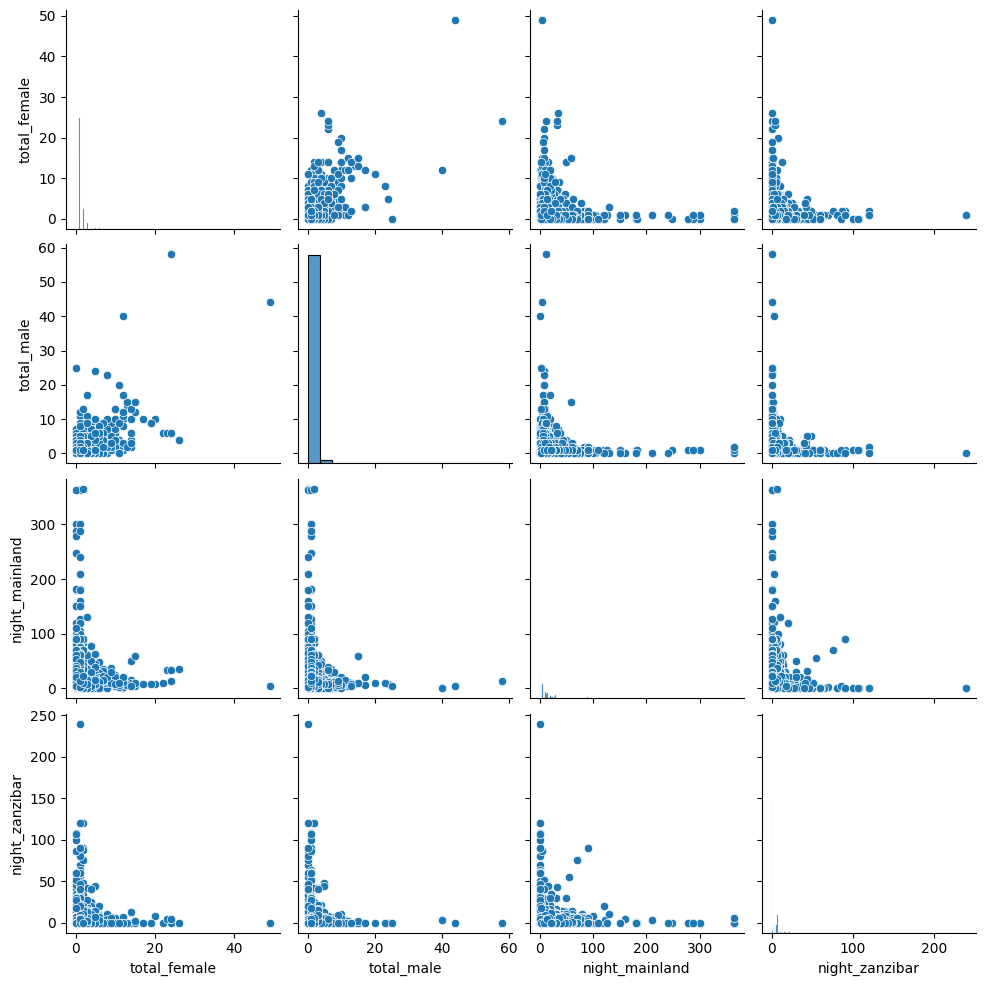

In [12]:
sns.pairplot(train) # computationally expensive - try to just run once!

<ipython-input-13-61effd411983>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = train.corr()


<Axes: >

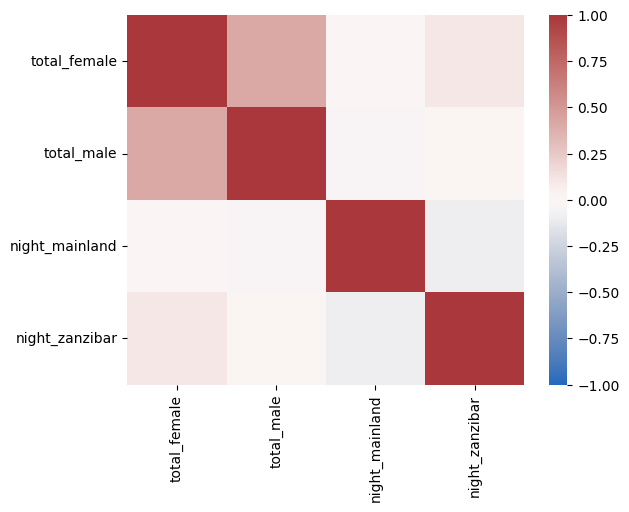

In [13]:
correlations = train.corr()
sns.heatmap(correlations, cmap="vlag", vmin=-1, vmax=1)

Now we do the same, but with categorical variables and crosstab:

<Axes: xlabel='country', ylabel='cost_category'>

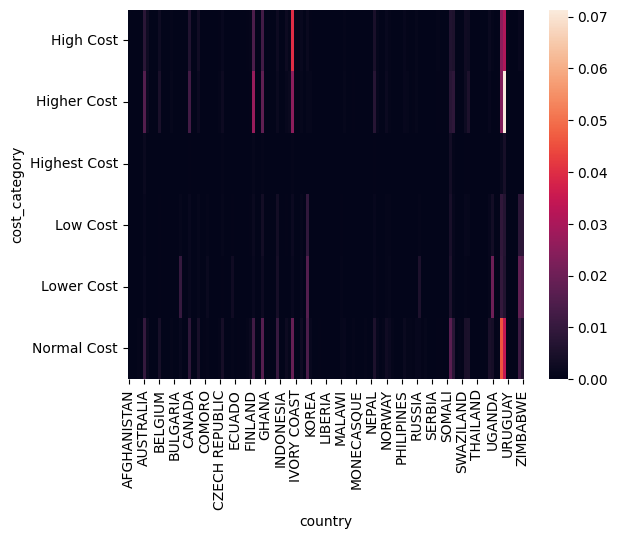

In [17]:
cost_by_country = pd.crosstab(train.cost_category, train.country, normalize=True)
sns.heatmap(cost_by_country)

Visualizations for country - main_activity::

<Axes: xlabel='age_group', ylabel='cost_category'>

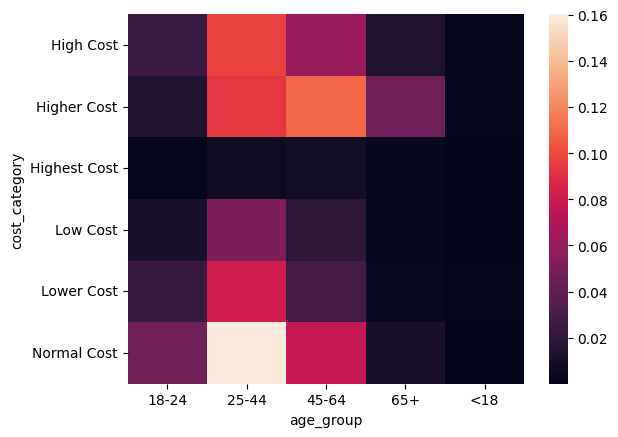

In [25]:
cost_by_age = pd.crosstab(train.cost_category, train.age_group, normalize=True)
sns.heatmap(cost_by_age)

<Axes: xlabel='age_group', ylabel='count'>

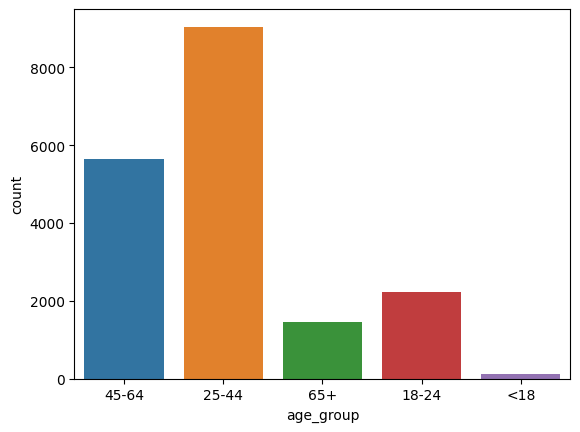

In [53]:
sns.countplot(
    x="age_group", data=train
)

<Axes: xlabel='travel_with', ylabel='cost_category'>

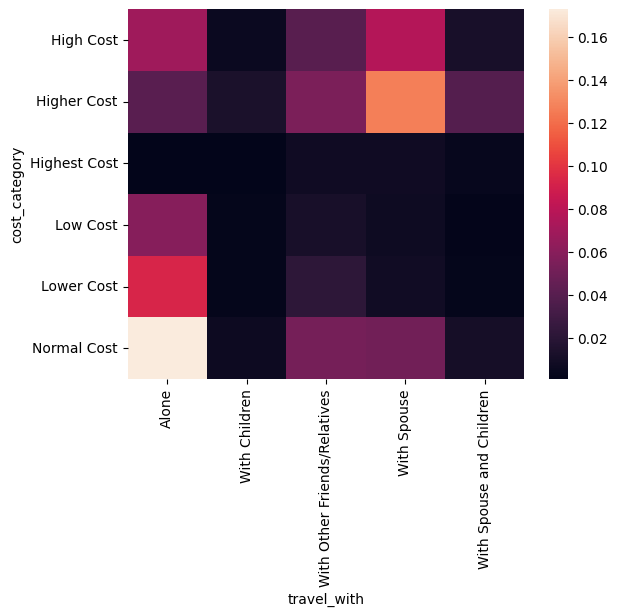

In [44]:
cost_by_travel_with = pd.crosstab(train.cost_category, train.travel_with, normalize=True)
sns.heatmap(cost_by_travel_with)

<Axes: xlabel='travel_with', ylabel='count'>

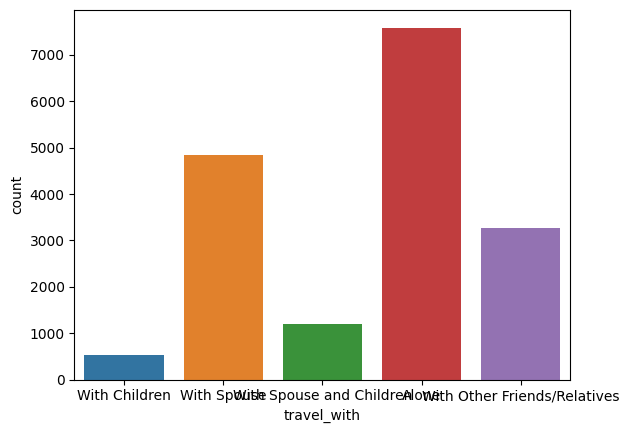

In [58]:
sns.countplot(
    x="travel_with", data=train, orient="v"
)

In [35]:
demographics = ["age_group", "total_female", "total_male"]

correlation = train[demographics].corr()
correlation

<ipython-input-35-2a3f4726a69b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train[demographics].corr()


,total_female,total_male
total_female,1.000000,0.417027
total_male,0.417027,1.000000


<Axes: >

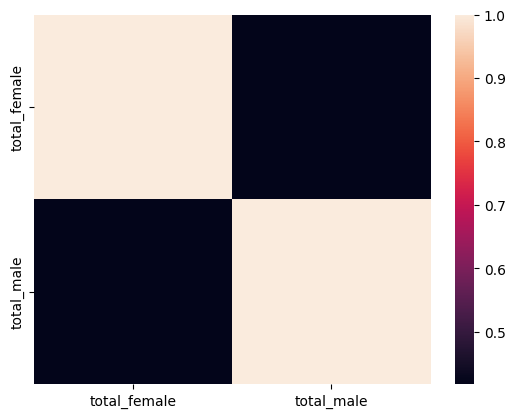

In [36]:
sns.heatmap(correlation)

In [61]:
import wordcloud 
from wordcloud import WordCloud, STOPWORDS

def wc(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update([])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = pyplot.figure(1, figsize=(16,16))
    pyplot.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    pyplot.imshow(wordcloud, interpolation='bilinear')
    pyplot.show()

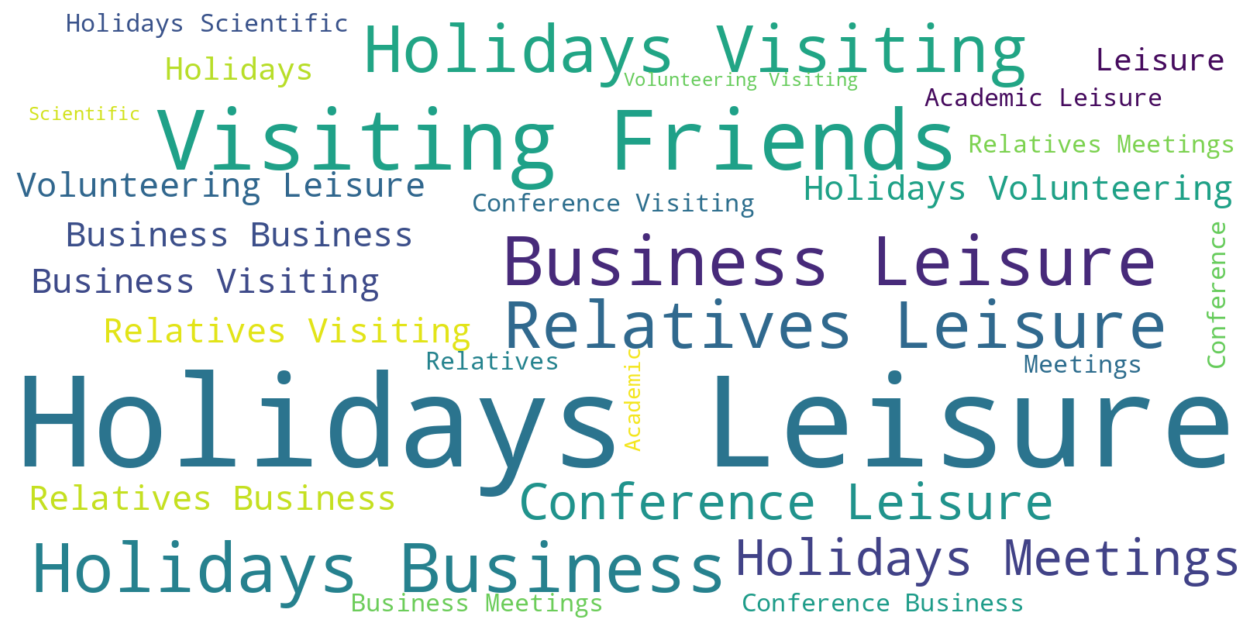

In [62]:
wc(train['purpose'], title = '', mask=None)

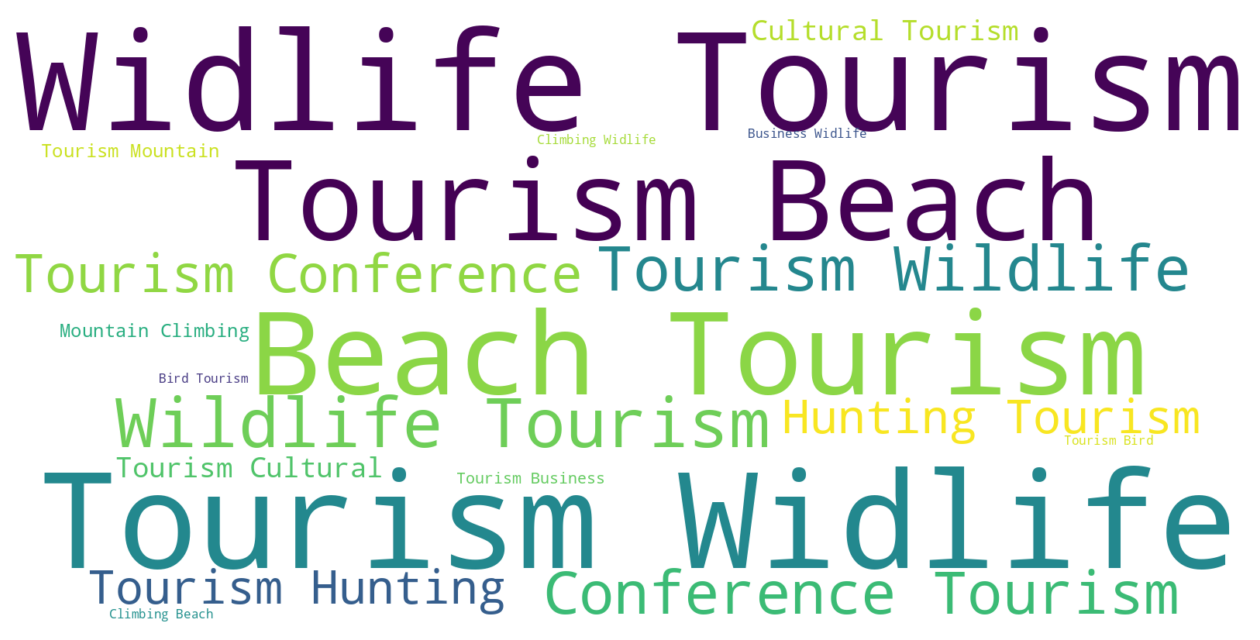

In [63]:
wc(train['main_activity'], title = '', mask=None)